In [0]:
import numpy as np
import pandas as pd
import keras
import sklearn.metrics as metrics
from google.colab import drive
drive.mount('/content/drive/')
data_path = '/content/drive/My Drive/Colab Notebooks/AML - Assignment 1/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
train_data = pd.read_csv(data_path + 'train.csv')
display(train_data)
test_data = pd.read_csv(data_path + 'test.csv')
test_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,80000.0,1,2,2,34,2,2,2,2,2,2,72557.0,77708.0,79384.0,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
26996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
26997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
26998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,30000.0,2,3,1,44,1,-2,-2,-2,-2,-1,0.0,0.0,0.0,0.0,0.0,379.0,0.0,0.0,0.0,0.0,379.0,0.0
1,260000.0,2,1,2,28,0,0,0,0,0,0,85666.0,92286.0,93742.0,93369.0,82476.0,73789.0,10005.0,4026.0,3481.0,141.0,20074.0,60308.0
2,80000.0,1,1,2,25,0,0,0,0,0,0,65734.0,58048.0,53012.0,53571.0,56721.0,57312.0,3000.0,3404.0,2000.0,4000.0,3000.0,5000.0
3,70000.0,2,2,2,42,1,2,0,0,0,0,70803.0,67344.0,59018.0,48033.0,48833.0,49736.0,10.0,2200.0,2100.0,1900.0,1841.0,1945.0
4,400000.0,1,3,1,33,0,0,2,0,0,0,2487.0,4708.0,2192.0,11111.0,5675.0,5071.0,4009.0,6.0,10248.0,4721.0,4114.0,1855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,210000.0,1,1,2,28,-1,-1,-1,-1,-1,-1,1832.0,1074.0,1002.0,711.0,420.0,1572.0,1074.0,1002.0,711.0,420.0,1572.0,0.0
2996,360000.0,2,1,1,36,-1,-1,-1,-1,-1,-1,18641.0,7174.0,11044.0,15887.0,8607.0,8843.0,7174.0,11044.0,15895.0,8607.0,8843.0,3000.0
2997,110000.0,2,2,2,31,2,0,0,0,0,2,1472.0,2785.0,5496.0,7496.0,9298.0,3340.0,1500.0,3000.0,2000.0,2000.0,0.0,93665.0
2998,340000.0,2,1,2,44,-2,-2,-2,-2,-2,-2,2732.0,2183.0,4103.0,12950.0,11372.0,2434.0,2183.0,4142.0,12950.0,11372.0,2434.0,2222.0


In [0]:
# find missing data
print(np.any(train_data.isnull()))
print(np.any(test_data.isnull()))

False
False


In [0]:
train_targets = train_data['default.payment.next.month'].values
train_data = train_data.iloc[:, :-1]
assert np.all(train_data.columns == test_data.columns), 'Train and test data have different columns and/or a different ordering of them'
train_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,80000.0,1,2,2,34,2,2,2,2,2,2,72557.0,77708.0,79384.0,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0
26996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
26997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
26998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


In [0]:
print('Train data | n_samples: ', train_data.shape[0])
print('Test data | n_samples: ', test_data.shape[0])
assert np.all(train_data.dtypes == test_data.dtypes), 'The data types of train and test columns do not match'
display(train_data.dtypes)
print('Train targets | n_samples: ', train_targets.size, ' dtype: ', train_targets.dtype)

Train data | n_samples:  27000
Test data | n_samples:  3000


LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
dtype: object

Train targets | n_samples:  27000  dtype:  int64


The train and test split of the data is at 90% - 10% ratio. The columns of two datasets have equal names and datatypes, as should be.

## Data Preparation
Let us proceed to normalize the data

In [0]:
display(train_data.describe())
test_data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,2.700000e+04,27000.000000,27000.000000,27000.000000,27000.000000,2.700000e+04,27000.000000,27000.000000,27000.000000,27000.000000
mean,167196.518519,1.603185,1.852444,1.551074,35.466667,-0.017704,-0.131259,-0.164963,-0.218704,-0.265148,-0.289963,51323.763407,49209.214889,4.698653e+04,43268.021926,40306.842667,38901.908259,5689.029370,5.931783e+03,5224.739037,4852.083778,4795.497259,5221.980185
std,129337.261882,0.489246,0.789157,0.522311,9.206436,1.125608,1.197965,1.198714,1.171908,1.136924,1.153581,73528.597002,71167.111334,6.929217e+04,64392.383099,60803.533634,59510.024370,16911.464096,2.352149e+04,17786.906985,15978.287986,15043.584614,18069.890373
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3600.000000,2986.000000,2.663000e+03,2313.000000,1746.000000,1261.000000,1000.000000,8.345000e+02,390.000000,291.750000,248.750000,106.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22431.000000,21188.500000,2.008800e+04,19067.500000,18118.500000,17137.500000,2100.000000,2.008500e+03,1800.000000,1500.000000,1504.500000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67591.750000,64145.250000,6.022025e+04,54656.750000,50245.500000,49326.250000,5005.000000,5.000000e+03,4500.000000,4006.000000,4036.250000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000
mean,170074.560000,1.608667,1.859333,1.559000,35.655000,-0.007667,-0.156333,-0.177333,-0.238333,-0.275667,-0.301333,50319.438333,48907.817667,47252.822667,43217.292333,40352.425667,38600.429667,5434.540667,5825.58500,5234.163667,4592.014667,4834.401000,5157.204000
std,133378.599177,0.488130,0.801099,0.518918,9.320315,1.107557,1.190111,1.180262,1.143955,1.099126,1.117265,74600.606248,71244.956888,69873.441874,63805.250939,60749.837409,59958.694437,13017.145584,18154.39093,15898.763507,12511.156025,17250.413316,14891.880054
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-5700.000000,-14115.000000,-34041.000000,-34503.000000,-36156.000000,-36156.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3263.250000,2953.250000,2703.750000,2442.750000,1908.250000,1145.250000,905.250000,802.00000,475.500000,307.000000,279.500000,216.250000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21566.000000,21491.500000,20088.500000,18966.000000,18013.000000,16555.000000,2112.000000,2014.50000,1839.500000,1500.000000,1457.000000,1504.500000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63135.250000,61734.500000,59633.750000,53068.250000,49695.250000,48231.250000,5100.000000,5000.00000,4701.000000,4173.250000,4020.250000,4416.750000
max,740000.000000,2.000000,6.000000,3.000000,73.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,746814.000000,597793.000000,689643.000000,569034.000000,551702.000000,568638.000000,235728.000000,415552.00000,338394.000000,177202.000000,388071.000000,220371.000000


The table above allows us to formulate the following hypotesis
1. no matter what the meaning of the `LIMIT_BAL` variable is, it has a minimum value of 10 000 and a max of 1 000 000.
1. `SEX` is a categorical unordered variable that can only take 1 or 2 as values. We should trasform this variable to a one hot encoding
1. `EDUCATION` can only take integer values between  0 and 6, in all likelyhood corresponding to lower to higher levels of education
1. `MARRIAGE` same as `SEX`, but with four different categories
1. `AGE` is numerical and technically unbunded above, but it can be normalized using as the higher limit the maximum value found in the dataset
1. 

In [0]:
# LIMIT_BAL
min_LIMIT_BAL = 10000
max_LIMIT_BAL = 1000000
train_data['LIMIT_BAL'] = (train_data['LIMIT_BAL'] - min_LIMIT_BAL) / (max_LIMIT_BAL - min_LIMIT_BAL)
train_data['LIMIT_BAL'] = train_data['LIMIT_BAL'].astype('float32')
test_data['LIMIT_BAL'] = (test_data['LIMIT_BAL'] - min_LIMIT_BAL) / (max_LIMIT_BAL - min_LIMIT_BAL)
test_data['LIMIT_BAL'] = test_data['LIMIT_BAL'].astype('float32')
train_data
test_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.020202,2,3,1,44,1,-2,-2,-2,-2,-1,0.0,0.0,0.0,0.0,0.0,379.0,0.0,0.0,0.0,0.0,379.0,0.0
1,0.252525,2,1,2,28,0,0,0,0,0,0,85666.0,92286.0,93742.0,93369.0,82476.0,73789.0,10005.0,4026.0,3481.0,141.0,20074.0,60308.0
2,0.070707,1,1,2,25,0,0,0,0,0,0,65734.0,58048.0,53012.0,53571.0,56721.0,57312.0,3000.0,3404.0,2000.0,4000.0,3000.0,5000.0
3,0.060606,2,2,2,42,1,2,0,0,0,0,70803.0,67344.0,59018.0,48033.0,48833.0,49736.0,10.0,2200.0,2100.0,1900.0,1841.0,1945.0
4,0.393939,1,3,1,33,0,0,2,0,0,0,2487.0,4708.0,2192.0,11111.0,5675.0,5071.0,4009.0,6.0,10248.0,4721.0,4114.0,1855.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.202020,1,1,2,28,-1,-1,-1,-1,-1,-1,1832.0,1074.0,1002.0,711.0,420.0,1572.0,1074.0,1002.0,711.0,420.0,1572.0,0.0
2996,0.353535,2,1,1,36,-1,-1,-1,-1,-1,-1,18641.0,7174.0,11044.0,15887.0,8607.0,8843.0,7174.0,11044.0,15895.0,8607.0,8843.0,3000.0
2997,0.101010,2,2,2,31,2,0,0,0,0,2,1472.0,2785.0,5496.0,7496.0,9298.0,3340.0,1500.0,3000.0,2000.0,2000.0,0.0,93665.0
2998,0.333333,2,1,2,44,-2,-2,-2,-2,-2,-2,2732.0,2183.0,4103.0,12950.0,11372.0,2434.0,2183.0,4142.0,12950.0,11372.0,2434.0,2222.0


In [0]:
# SEX
# For the sake naming, we will assume that '1' means 'man' and '2' 'woman'
train_sexes = keras.utils.to_categorical(train_data['SEX'])[:, 1:]
train_sexes = pd.DataFrame(train_sexes, columns = ['MALE', 'FEMALE'])
train_sexes
train_data.drop(columns = 'SEX', inplace = True)
train_data = pd.concat((train_data, train_sexes), axis = 'columns')
del train_sexes
train_data

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,FEMALE
0,0.010101,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.111111,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0.0,1.0
2,0.080808,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,1.0
3,0.040404,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,1.0
4,0.040404,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.070707,2,2,34,2,2,2,2,2,2,72557.0,77708.0,79384.0,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1.0,0.0
26996,0.212121,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,1.0,0.0
26997,0.141414,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,1.0,0.0
26998,0.020202,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0,0.0


In [0]:
# SEX
test_sexes = keras.utils.to_categorical(test_data['SEX'])[:, 1:]
test_sexes = pd.DataFrame(test_sexes, columns = ['MALE', 'FEMALE'])
test_sexes
test_data.drop(columns = 'SEX', inplace = True)
test_data = pd.concat((test_data, test_sexes), axis = 'columns')
del test_sexes
test_data

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,FEMALE
0,0.020202,3,1,44,1,-2,-2,-2,-2,-1,0.0,0.0,0.0,0.0,0.0,379.0,0.0,0.0,0.0,0.0,379.0,0.0,0.0,1.0
1,0.252525,1,2,28,0,0,0,0,0,0,85666.0,92286.0,93742.0,93369.0,82476.0,73789.0,10005.0,4026.0,3481.0,141.0,20074.0,60308.0,0.0,1.0
2,0.070707,1,2,25,0,0,0,0,0,0,65734.0,58048.0,53012.0,53571.0,56721.0,57312.0,3000.0,3404.0,2000.0,4000.0,3000.0,5000.0,1.0,0.0
3,0.060606,2,2,42,1,2,0,0,0,0,70803.0,67344.0,59018.0,48033.0,48833.0,49736.0,10.0,2200.0,2100.0,1900.0,1841.0,1945.0,0.0,1.0
4,0.393939,3,1,33,0,0,2,0,0,0,2487.0,4708.0,2192.0,11111.0,5675.0,5071.0,4009.0,6.0,10248.0,4721.0,4114.0,1855.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.202020,1,2,28,-1,-1,-1,-1,-1,-1,1832.0,1074.0,1002.0,711.0,420.0,1572.0,1074.0,1002.0,711.0,420.0,1572.0,0.0,1.0,0.0
2996,0.353535,1,1,36,-1,-1,-1,-1,-1,-1,18641.0,7174.0,11044.0,15887.0,8607.0,8843.0,7174.0,11044.0,15895.0,8607.0,8843.0,3000.0,0.0,1.0
2997,0.101010,2,2,31,2,0,0,0,0,2,1472.0,2785.0,5496.0,7496.0,9298.0,3340.0,1500.0,3000.0,2000.0,2000.0,0.0,93665.0,0.0,1.0
2998,0.333333,1,2,44,-2,-2,-2,-2,-2,-2,2732.0,2183.0,4103.0,12950.0,11372.0,2434.0,2183.0,4142.0,12950.0,11372.0,2434.0,2222.0,0.0,1.0


In [0]:
# EDUCATION
min_EDU = 0.
max_EDU = 6.
train_data['EDUCATION'] = (train_data['EDUCATION'] - min_EDU) / (max_EDU - min_EDU)   # in this way we also convert to float64
train_data['EDUCATION'] = train_data['EDUCATION'].astype('float32')
test_data['EDUCATION'] = (test_data['EDUCATION'] - min_EDU) / (max_EDU - min_EDU)
test_data['EDUCATION'] = test_data['EDUCATION'].astype('float32')
display(train_data)
test_data

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,FEMALE
0,0.010101,0.333333,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.111111,0.333333,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0.0,1.0
2,0.080808,0.333333,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,1.0
3,0.040404,0.333333,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,1.0
4,0.040404,0.333333,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.070707,0.333333,2,34,2,2,2,2,2,2,72557.0,77708.0,79384.0,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1.0,0.0
26996,0.212121,0.500000,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,1.0,0.0
26997,0.141414,0.500000,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,1.0,0.0
26998,0.020202,0.333333,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0,0.0


,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,FEMALE
0,0.020202,0.500000,1,44,1,-2,-2,-2,-2,-1,0.0,0.0,0.0,0.0,0.0,379.0,0.0,0.0,0.0,0.0,379.0,0.0,0.0,1.0
1,0.252525,0.166667,2,28,0,0,0,0,0,0,85666.0,92286.0,93742.0,93369.0,82476.0,73789.0,10005.0,4026.0,3481.0,141.0,20074.0,60308.0,0.0,1.0
2,0.070707,0.166667,2,25,0,0,0,0,0,0,65734.0,58048.0,53012.0,53571.0,56721.0,57312.0,3000.0,3404.0,2000.0,4000.0,3000.0,5000.0,1.0,0.0
3,0.060606,0.333333,2,42,1,2,0,0,0,0,70803.0,67344.0,59018.0,48033.0,48833.0,49736.0,10.0,2200.0,2100.0,1900.0,1841.0,1945.0,0.0,1.0
4,0.393939,0.500000,1,33,0,0,2,0,0,0,2487.0,4708.0,2192.0,11111.0,5675.0,5071.0,4009.0,6.0,10248.0,4721.0,4114.0,1855.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.202020,0.166667,2,28,-1,-1,-1,-1,-1,-1,1832.0,1074.0,1002.0,711.0,420.0,1572.0,1074.0,1002.0,711.0,420.0,1572.0,0.0,1.0,0.0
2996,0.353535,0.166667,1,36,-1,-1,-1,-1,-1,-1,18641.0,7174.0,11044.0,15887.0,8607.0,8843.0,7174.0,11044.0,15895.0,8607.0,8843.0,3000.0,0.0,1.0
2997,0.101010,0.333333,2,31,2,0,0,0,0,2,1472.0,2785.0,5496.0,7496.0,9298.0,3340.0,1500.0,3000.0,2000.0,2000.0,0.0,93665.0,0.0,1.0
2998,0.333333,0.166667,2,44,-2,-2,-2,-2,-2,-2,2732.0,2183.0,4103.0,12950.0,11372.0,2434.0,2183.0,4142.0,12950.0,11372.0,2434.0,2222.0,0.0,1.0


In [0]:
# MARRIAGE
train_marriage = keras.utils.to_categorical(train_data['MARRIAGE'])
marriage_columns = ['MARRIAGE_ONE', 'MARRIAGE_TWO', 'MARRIAGE_THREE', 'MARRIAGE_FOUR',]
train_marriage = pd.DataFrame(train_marriage, columns = marriage_columns)
train_data = pd.concat((train_data, train_marriage), axis = 'columns')
train_data.drop('MARRIAGE', axis = 'columns', inplace = True)
display(train_data)

test_marriage = keras.utils.to_categorical(test_data['MARRIAGE'])
test_marriage = pd.DataFrame(test_marriage, columns = marriage_columns)
test_data = pd.concat((test_data, test_marriage), axis = 'columns')
test_data.drop('MARRIAGE', axis = 'columns', inplace = True)
display(test_data)
del train_marriage, test_marriage, marriage_columns

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,FEMALE,MARRIAGE_ONE,MARRIAGE_TWO,MARRIAGE_THREE,MARRIAGE_FOUR
0,0.010101,0.333333,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.111111,0.333333,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.080808,0.333333,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.040404,0.333333,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.040404,0.333333,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.070707,0.333333,34,2,2,2,2,2,2,72557.0,77708.0,79384.0,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1.0,0.0,0.0,0.0,1.0,0.0
26996,0.212121,0.500000,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,1.0,0.0,0.0,1.0,0.0,0.0
26997,0.141414,0.500000,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
26998,0.020202,0.333333,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0,0.0,0.0,0.0,1.0,0.0


,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,FEMALE,MARRIAGE_ONE,MARRIAGE_TWO,MARRIAGE_THREE,MARRIAGE_FOUR
0,0.020202,0.500000,44,1,-2,-2,-2,-2,-1,0.0,0.0,0.0,0.0,0.0,379.0,0.0,0.0,0.0,0.0,379.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.252525,0.166667,28,0,0,0,0,0,0,85666.0,92286.0,93742.0,93369.0,82476.0,73789.0,10005.0,4026.0,3481.0,141.0,20074.0,60308.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.070707,0.166667,25,0,0,0,0,0,0,65734.0,58048.0,53012.0,53571.0,56721.0,57312.0,3000.0,3404.0,2000.0,4000.0,3000.0,5000.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.060606,0.333333,42,1,2,0,0,0,0,70803.0,67344.0,59018.0,48033.0,48833.0,49736.0,10.0,2200.0,2100.0,1900.0,1841.0,1945.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.393939,0.500000,33,0,0,2,0,0,0,2487.0,4708.0,2192.0,11111.0,5675.0,5071.0,4009.0,6.0,10248.0,4721.0,4114.0,1855.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.202020,0.166667,28,-1,-1,-1,-1,-1,-1,1832.0,1074.0,1002.0,711.0,420.0,1572.0,1074.0,1002.0,711.0,420.0,1572.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2996,0.353535,0.166667,36,-1,-1,-1,-1,-1,-1,18641.0,7174.0,11044.0,15887.0,8607.0,8843.0,7174.0,11044.0,15895.0,8607.0,8843.0,3000.0,0.0,1.0,0.0,1.0,0.0,0.0
2997,0.101010,0.333333,31,2,0,0,0,0,2,1472.0,2785.0,5496.0,7496.0,9298.0,3340.0,1500.0,3000.0,2000.0,2000.0,0.0,93665.0,0.0,1.0,0.0,0.0,1.0,0.0
2998,0.333333,0.166667,44,-2,-2,-2,-2,-2,-2,2732.0,2183.0,4103.0,12950.0,11372.0,2434.0,2183.0,4142.0,12950.0,11372.0,2434.0,2222.0,0.0,1.0,0.0,0.0,1.0,0.0


In [0]:
# AGE
min_AGE = 21.
max_AGE = max(train_data['AGE'].max(), test_data['AGE'].max())
train_data['AGE'] = (train_data['AGE'] - min_AGE) / (max_AGE - min_AGE)
test_data['AGE'] = (test_data['AGE'] - min_AGE) / (max_AGE - min_AGE)
display(train_data)
test_data

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,FEMALE,MARRIAGE_ONE,MARRIAGE_TWO,MARRIAGE_THREE,MARRIAGE_FOUR
0,0.010101,0.333333,0.051724,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.111111,0.333333,0.086207,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.080808,0.333333,0.224138,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.040404,0.333333,0.275862,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.040404,0.333333,0.620690,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.070707,0.333333,0.224138,2,2,2,2,2,2,72557.0,77708.0,79384.0,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1.0,0.0,0.0,0.0,1.0,0.0
26996,0.212121,0.500000,0.310345,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,1.0,0.0,0.0,1.0,0.0,0.0
26997,0.141414,0.500000,0.379310,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
26998,0.020202,0.333333,0.275862,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0,0.0,0.0,0.0,1.0,0.0


,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,FEMALE,MARRIAGE_ONE,MARRIAGE_TWO,MARRIAGE_THREE,MARRIAGE_FOUR
0,0.020202,0.500000,0.396552,1,-2,-2,-2,-2,-1,0.0,0.0,0.0,0.0,0.0,379.0,0.0,0.0,0.0,0.0,379.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.252525,0.166667,0.120690,0,0,0,0,0,0,85666.0,92286.0,93742.0,93369.0,82476.0,73789.0,10005.0,4026.0,3481.0,141.0,20074.0,60308.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.070707,0.166667,0.068966,0,0,0,0,0,0,65734.0,58048.0,53012.0,53571.0,56721.0,57312.0,3000.0,3404.0,2000.0,4000.0,3000.0,5000.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.060606,0.333333,0.362069,1,2,0,0,0,0,70803.0,67344.0,59018.0,48033.0,48833.0,49736.0,10.0,2200.0,2100.0,1900.0,1841.0,1945.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.393939,0.500000,0.206897,0,0,2,0,0,0,2487.0,4708.0,2192.0,11111.0,5675.0,5071.0,4009.0,6.0,10248.0,4721.0,4114.0,1855.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.202020,0.166667,0.120690,-1,-1,-1,-1,-1,-1,1832.0,1074.0,1002.0,711.0,420.0,1572.0,1074.0,1002.0,711.0,420.0,1572.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2996,0.353535,0.166667,0.258621,-1,-1,-1,-1,-1,-1,18641.0,7174.0,11044.0,15887.0,8607.0,8843.0,7174.0,11044.0,15895.0,8607.0,8843.0,3000.0,0.0,1.0,0.0,1.0,0.0,0.0
2997,0.101010,0.333333,0.172414,2,0,0,0,0,2,1472.0,2785.0,5496.0,7496.0,9298.0,3340.0,1500.0,3000.0,2000.0,2000.0,0.0,93665.0,0.0,1.0,0.0,0.0,1.0,0.0
2998,0.333333,0.166667,0.396552,-2,-2,-2,-2,-2,-2,2732.0,2183.0,4103.0,12950.0,11372.0,2434.0,2183.0,4142.0,12950.0,11372.0,2434.0,2222.0,0.0,1.0,0.0,0.0,1.0,0.0


In [0]:
print(np.sort(train_data['PAY_0'].unique()))
print(np.sort(train_data['PAY_2'].unique()))
print(np.sort(train_data['PAY_3'].unique()))
print(np.sort(train_data['PAY_4'].unique()))
print(np.sort(train_data['PAY_5'].unique()))
print(np.sort(train_data['PAY_6'].unique()))

[-2 -1  0  1  2  3  4  5  6  7  8]
[-2 -1  0  1  2  3  4  5  6  7  8]
[-2 -1  0  1  2  3  4  5  6  7  8]
[-2 -1  0  1  2  3  4  5  6  7  8]
[-2 -1  0  2  3  4  5  6  7  8]
[-2 -1  0  2  3  4  5  6  7  8]


We can see that all the `PAY` columns have identiacal structure, so that they can be normalized in the same way.

In [0]:
min_PAY = -2
max_PAY = 8
def scale(x, min, max):
  return (x - min) / (max - min)
train_data.loc[:, 'PAY_0':'PAY_6'] = scale(train_data.loc[:, 'PAY_0':'PAY_6'], min_PAY, max_PAY)
display(train_data)
test_data.loc[:, 'PAY_0':'PAY_6'] = scale(test_data.loc[:, 'PAY_0':'PAY_6'], min_PAY, max_PAY)
display(test_data)

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,FEMALE,MARRIAGE_ONE,MARRIAGE_TWO,MARRIAGE_THREE,MARRIAGE_FOUR
0,0.010101,0.333333,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.111111,0.333333,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.080808,0.333333,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.040404,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.040404,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.070707,0.333333,0.224138,0.4,0.4,0.4,0.4,0.4,0.4,72557.0,77708.0,79384.0,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1.0,0.0,0.0,0.0,1.0,0.0
26996,0.212121,0.500000,0.310345,0.2,0.2,0.2,0.2,0.2,0.2,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,1.0,0.0,0.0,1.0,0.0,0.0
26997,0.141414,0.500000,0.379310,0.1,0.1,0.1,0.1,0.2,0.2,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
26998,0.020202,0.333333,0.275862,0.6,0.5,0.4,0.1,0.2,0.2,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0,0.0,0.0,0.0,1.0,0.0


,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,FEMALE,MARRIAGE_ONE,MARRIAGE_TWO,MARRIAGE_THREE,MARRIAGE_FOUR
0,0.020202,0.500000,0.396552,0.3,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,379.0,0.0,0.0,0.0,0.0,379.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.252525,0.166667,0.120690,0.2,0.2,0.2,0.2,0.2,0.2,85666.0,92286.0,93742.0,93369.0,82476.0,73789.0,10005.0,4026.0,3481.0,141.0,20074.0,60308.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.070707,0.166667,0.068966,0.2,0.2,0.2,0.2,0.2,0.2,65734.0,58048.0,53012.0,53571.0,56721.0,57312.0,3000.0,3404.0,2000.0,4000.0,3000.0,5000.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.060606,0.333333,0.362069,0.3,0.4,0.2,0.2,0.2,0.2,70803.0,67344.0,59018.0,48033.0,48833.0,49736.0,10.0,2200.0,2100.0,1900.0,1841.0,1945.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.393939,0.500000,0.206897,0.2,0.2,0.4,0.2,0.2,0.2,2487.0,4708.0,2192.0,11111.0,5675.0,5071.0,4009.0,6.0,10248.0,4721.0,4114.0,1855.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.202020,0.166667,0.120690,0.1,0.1,0.1,0.1,0.1,0.1,1832.0,1074.0,1002.0,711.0,420.0,1572.0,1074.0,1002.0,711.0,420.0,1572.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2996,0.353535,0.166667,0.258621,0.1,0.1,0.1,0.1,0.1,0.1,18641.0,7174.0,11044.0,15887.0,8607.0,8843.0,7174.0,11044.0,15895.0,8607.0,8843.0,3000.0,0.0,1.0,0.0,1.0,0.0,0.0
2997,0.101010,0.333333,0.172414,0.4,0.2,0.2,0.2,0.2,0.4,1472.0,2785.0,5496.0,7496.0,9298.0,3340.0,1500.0,3000.0,2000.0,2000.0,0.0,93665.0,0.0,1.0,0.0,0.0,1.0,0.0
2998,0.333333,0.166667,0.396552,0.0,0.0,0.0,0.0,0.0,0.0,2732.0,2183.0,4103.0,12950.0,11372.0,2434.0,2183.0,4142.0,12950.0,11372.0,2434.0,2222.0,0.0,1.0,0.0,0.0,1.0,0.0


In [0]:
print(np.sort(train_data['BILL_AMT1'].unique()))
print(np.sort(train_data['BILL_AMT2'].unique()))
print(np.sort(train_data['BILL_AMT3'].unique()))
print(np.sort(train_data['BILL_AMT4'].unique()))
print(np.sort(train_data['BILL_AMT5'].unique()))
print(np.sort(train_data['BILL_AMT6'].unique()))

[-165580. -154973.  -15308. ...  630458.  653062.  964511.]
[-69777. -67526. -33350. ... 671563. 743970. 983931.]
[-157264.  -61506.  -46127. ...  693131.  855086. 1664089.]
[-170000.  -81334.  -65167. ...  628699.  706864.  891586.]
[-81334. -61372. -53007. ... 587067. 823540. 927171.]
[-339603. -209051. -150953. ...  527711.  699944.  961664.]


In [0]:
from sklearn.preprocessing import StandardScaler
train_data.loc[:, 'BILL_AMT1':'BILL_AMT6'] = StandardScaler().fit_transform(train_data.loc[:, 'BILL_AMT1':'BILL_AMT6'])
test_data.loc[:, 'BILL_AMT1':'BILL_AMT6'] = StandardScaler().fit_transform(test_data.loc[:, 'BILL_AMT1':'BILL_AMT6'])
display(train_data)
test_data

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,FEMALE,MARRIAGE_ONE,MARRIAGE_TWO,MARRIAGE_THREE,MARRIAGE_FOUR
0,0.010101,0.333333,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,-0.644805,-0.647885,-0.668162,-0.671956,-0.662915,-0.653716,0.0,689.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.111111,0.333333,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,-0.661548,-0.667234,-0.639399,-0.621141,-0.606092,-0.598917,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.080808,0.333333,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,-0.300362,-0.494370,-0.482423,-0.449394,-0.417070,-0.392427,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.040404,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,-0.058941,-0.013717,0.033258,-0.232237,-0.186635,-0.157202,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.040404,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,-0.580829,-0.611800,-0.160938,-0.346756,-0.348026,-0.332234,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.070707,0.333333,0.224138,0.4,0.4,0.4,0.4,0.4,0.4,0.288781,0.400456,0.467558,0.531920,0.695699,0.710080,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1.0,0.0,0.0,0.0,1.0,0.0
26996,0.212121,0.500000,0.310345,0.2,0.2,0.2,0.2,0.2,0.2,1.871745,2.017905,2.329000,0.694753,-0.149169,-0.385184,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,1.0,0.0,0.0,1.0,0.0,0.0
26997,0.141414,0.500000,0.379310,0.1,0.1,0.1,0.1,0.2,0.2,-0.675134,-0.665786,-0.627565,-0.532511,-0.577557,-0.653716,1837.0,3526.0,8998.0,129.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
26998,0.020202,0.333333,0.275862,0.6,0.5,0.4,0.1,0.2,0.2,-0.649538,-0.644315,-0.638302,-0.347719,-0.324409,-0.328437,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0,0.0,0.0,0.0,1.0,0.0


,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,FEMALE,MARRIAGE_ONE,MARRIAGE_TWO,MARRIAGE_THREE,MARRIAGE_FOUR
0,0.020202,0.500000,0.396552,0.3,0.0,0.0,0.0,0.0,0.1,-0.674630,-0.686589,-0.676376,-0.677444,-0.664350,-0.637569,0.0,0.0,0.0,0.0,379.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.252525,0.166667,0.120690,0.2,0.2,0.2,0.2,0.2,0.2,0.473890,0.608961,0.665445,0.786143,0.693510,0.586978,10005.0,4026.0,3481.0,141.0,20074.0,60308.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.070707,0.166667,0.068966,0.2,0.2,0.2,0.2,0.2,0.2,0.206662,0.128314,0.082437,0.162298,0.269487,0.312126,3000.0,3404.0,2000.0,4000.0,3000.0,5000.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.060606,0.333333,0.362069,0.3,0.4,0.2,0.2,0.2,0.2,0.274622,0.258815,0.168406,0.075488,0.139622,0.185752,10.0,2200.0,2100.0,1900.0,1841.0,1945.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.393939,0.500000,0.206897,0.2,0.2,0.4,0.2,0.2,0.2,-0.641287,-0.620496,-0.644999,-0.503276,-0.570919,-0.559302,4009.0,6.0,10248.0,4721.0,4114.0,1855.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.202020,0.166667,0.120690,0.1,0.1,0.1,0.1,0.1,0.1,-0.650069,-0.671511,-0.662033,-0.666299,-0.657435,-0.617669,1074.0,1002.0,711.0,420.0,1572.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2996,0.353535,0.166667,0.258621,0.1,0.1,0.1,0.1,0.1,0.1,-0.424711,-0.585877,-0.518292,-0.428411,-0.522647,-0.496382,7174.0,11044.0,15895.0,8607.0,8843.0,3000.0,0.0,1.0,0.0,1.0,0.0,0.0
2997,0.101010,0.333333,0.172414,0.4,0.2,0.2,0.2,0.2,0.4,-0.654895,-0.647492,-0.597706,-0.559942,-0.511271,-0.588177,1500.0,3000.0,2000.0,2000.0,0.0,93665.0,0.0,1.0,0.0,0.0,1.0,0.0
2998,0.333333,0.166667,0.396552,0.0,0.0,0.0,0.0,0.0,0.0,-0.638002,-0.655943,-0.617645,-0.474449,-0.477125,-0.603290,2183.0,4142.0,12950.0,11372.0,2434.0,2222.0,0.0,1.0,0.0,0.0,1.0,0.0


In [0]:
print(np.sort(train_data['PAY_AMT1'].unique()))
print(np.sort(train_data['PAY_AMT2'].unique()))
print(np.sort(train_data['PAY_AMT3'].unique()))
print(np.sort(train_data['PAY_AMT4'].unique()))
print(np.sort(train_data['PAY_AMT5'].unique()))
print(np.sort(train_data['PAY_AMT6'].unique()))
print(np.sort(test_data['PAY_AMT1'].unique()))
print(np.sort(test_data['PAY_AMT2'].unique()))
print(np.sort(test_data['PAY_AMT3'].unique()))
print(np.sort(test_data['PAY_AMT4'].unique()))
print(np.sort(test_data['PAY_AMT5'].unique()))
print(np.sort(test_data['PAY_AMT6'].unique()))

[0.00000e+00 1.00000e+00 2.00000e+00 ... 4.93358e+05 5.05000e+05
 8.73552e+05]
[0.000000e+00 1.000000e+00 2.000000e+00 ... 1.215471e+06 1.227082e+06
 1.684259e+06]
[0.00000e+00 1.00000e+00 2.00000e+00 ... 5.08229e+05 8.89043e+05
 8.96040e+05]
[0.00000e+00 1.00000e+00 2.00000e+00 ... 4.97000e+05 5.28897e+05
 6.21000e+05]
[0.00000e+00 1.00000e+00 2.00000e+00 ... 3.79267e+05 4.17990e+05
 4.26529e+05]
[0.00000e+00 1.00000e+00 2.00000e+00 ... 4.43001e+05 5.27143e+05
 5.28666e+05]
[0.00000e+00 1.00000e+00 3.00000e+00 ... 1.91446e+05 1.95316e+05
 2.35728e+05]
[0.00000e+00 1.00000e+00 2.00000e+00 ... 2.74526e+05 3.44261e+05
 4.15552e+05]
[0.00000e+00 1.00000e+00 2.00000e+00 ... 2.82562e+05 3.24097e+05
 3.38394e+05]
[0.00000e+00 1.00000e+00 2.00000e+00 ... 1.60000e+05 1.68342e+05
 1.77202e+05]
[0.00000e+00 1.00000e+00 2.00000e+00 ... 3.10135e+05 3.17077e+05
 3.88071e+05]
[0.00000e+00 1.00000e+00 2.00000e+00 ... 2.01277e+05 2.04395e+05
 2.20371e+05]


In [0]:
from sklearn.preprocessing import MinMaxScaler
train_data.loc[:, 'PAY_AMT1':'PAY_AMT6'] = MinMaxScaler().fit_transform(train_data.loc[:, 'PAY_AMT1':'PAY_AMT6'])
test_data.loc[:, 'PAY_AMT1':'PAY_AMT6'] = MinMaxScaler().fit_transform(test_data.loc[:, 'PAY_AMT1':'PAY_AMT6'])
display(train_data)
test_data

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,FEMALE,MARRIAGE_ONE,MARRIAGE_TWO,MARRIAGE_THREE,MARRIAGE_FOUR
0,0.010101,0.333333,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,-0.644805,-0.647885,-0.668162,-0.671956,-0.662915,-0.653716,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0
1,0.111111,0.333333,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,-0.661548,-0.667234,-0.639399,-0.621141,-0.606092,-0.598917,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,0.0,1.0,0.0,0.0,1.0,0.0
2,0.080808,0.333333,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,-0.300362,-0.494370,-0.482423,-0.449394,-0.417070,-0.392427,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0,1.0,0.0,0.0,1.0,0.0
3,0.040404,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,-0.058941,-0.013717,0.033258,-0.232237,-0.186635,-0.157202,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0,1.0,0.0,1.0,0.0,0.0
4,0.040404,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,-0.580829,-0.611800,-0.160938,-0.346756,-0.348026,-0.332234,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,0.070707,0.333333,0.224138,0.4,0.4,0.4,0.4,0.4,0.4,0.288781,0.400456,0.467558,0.531920,0.695699,0.710080,0.008013,0.002078,0.000000,0.011272,0.000000,0.007566,1.0,0.0,0.0,0.0,1.0,0.0
26996,0.212121,0.500000,0.310345,0.2,0.2,0.2,0.2,0.2,0.2,1.871745,2.017905,2.329000,0.694753,-0.149169,-0.385184,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892,1.0,0.0,0.0,1.0,0.0,0.0
26997,0.141414,0.500000,0.379310,0.1,0.1,0.1,0.1,0.2,0.2,-0.675134,-0.665786,-0.627565,-0.532511,-0.577557,-0.653716,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
26998,0.020202,0.333333,0.275862,0.6,0.5,0.4,0.1,0.2,0.2,-0.649538,-0.644315,-0.638302,-0.347719,-0.324409,-0.328437,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864,1.0,0.0,0.0,0.0,1.0,0.0


,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MALE,FEMALE,MARRIAGE_ONE,MARRIAGE_TWO,MARRIAGE_THREE,MARRIAGE_FOUR
0,0.020202,0.500000,0.396552,0.3,0.0,0.0,0.0,0.0,0.1,-0.674630,-0.686589,-0.676376,-0.677444,-0.664350,-0.637569,0.000000,0.000000,0.000000,0.000000,0.000977,0.000000,0.0,1.0,0.0,1.0,0.0,0.0
1,0.252525,0.166667,0.120690,0.2,0.2,0.2,0.2,0.2,0.2,0.473890,0.608961,0.665445,0.786143,0.693510,0.586978,0.042443,0.009688,0.010287,0.000796,0.051728,0.273666,0.0,1.0,0.0,0.0,1.0,0.0
2,0.070707,0.166667,0.068966,0.2,0.2,0.2,0.2,0.2,0.2,0.206662,0.128314,0.082437,0.162298,0.269487,0.312126,0.012727,0.008192,0.005910,0.022573,0.007731,0.022689,1.0,0.0,0.0,0.0,1.0,0.0
3,0.060606,0.333333,0.362069,0.3,0.4,0.2,0.2,0.2,0.2,0.274622,0.258815,0.168406,0.075488,0.139622,0.185752,0.000042,0.005294,0.006206,0.010722,0.004744,0.008826,0.0,1.0,0.0,0.0,1.0,0.0
4,0.393939,0.500000,0.206897,0.2,0.2,0.4,0.2,0.2,0.2,-0.641287,-0.620496,-0.644999,-0.503276,-0.570919,-0.559302,0.017007,0.000014,0.030284,0.026642,0.010601,0.008418,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.202020,0.166667,0.120690,0.1,0.1,0.1,0.1,0.1,0.1,-0.650069,-0.671511,-0.662033,-0.666299,-0.657435,-0.617669,0.004556,0.002411,0.002101,0.002370,0.004051,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
2996,0.353535,0.166667,0.258621,0.1,0.1,0.1,0.1,0.1,0.1,-0.424711,-0.585877,-0.518292,-0.428411,-0.522647,-0.496382,0.030433,0.026577,0.046972,0.048572,0.022787,0.013613,0.0,1.0,0.0,1.0,0.0,0.0
2997,0.101010,0.333333,0.172414,0.4,0.2,0.2,0.2,0.2,0.4,-0.654895,-0.647492,-0.597706,-0.559942,-0.511271,-0.588177,0.006363,0.007219,0.005910,0.011287,0.000000,0.425033,0.0,1.0,0.0,0.0,1.0,0.0
2998,0.333333,0.166667,0.396552,0.0,0.0,0.0,0.0,0.0,0.0,-0.638002,-0.655943,-0.617645,-0.474449,-0.477125,-0.603290,0.009261,0.009967,0.038269,0.064175,0.006272,0.010083,0.0,1.0,0.0,0.0,1.0,0.0


In [0]:
train_targets_resh = keras.utils.to_categorical(train_targets)

<br><br/>
## Model Construction

This is a binary classification task, so we can make a model in which:
1. the output neuron is one, with an output value $\in [0,1]$, representing the Bayesian probability that the class is positive, i.e. the configdence of the NN on the fact that class = 1.
1. a good loss function is the categorical crossentropy
1. we can choose the sigmoid as an activation function for the output layer

Let us buil a model with ReLU hidden layers

In [0]:
def create_model():
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(27, input_shape = (27,), activation = 'relu'))
  model.add(keras.layers.Dense(27, activation = 'relu'))
  model.add(keras.layers.Dense(27, activation = 'relu'))
  model.add(keras.layers.Dense(1, activation = 'sigmoid'))
  model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

What are the right metrics for this task? Are rare classes present?

In [0]:
index, value = np.unique(train_targets, return_counts = True)
index = np.array(index, dtype = 'str')
value = 100 * value / np.sum(value) # from abs frequ to % rel freq
class_count = pd.Series(value, index = index)
display(class_count)

0    77.877778
1    22.122222
dtype: float64

So the baseline for accuracy is ~78%. The two classes are unbalanced, but not heavily so. Still, it is wise to compute precision and recal other than the accuracy.

In [0]:
def get_conf_mat(model, data, targets):
  predictions = model.predict(data)
  predictions = predictions.reshape((predictions.size,))
  predictions = predictions > 0.5
  targets = np.array(targets, dtype = 'bool')
  TP = np.sum( (predictions == 1) & (targets == 1) )
  TN = np.sum( (predictions == 0) & (targets == 0) )
  FP = np.sum( (predictions == 1) & (targets == 0) )
  FN = np.sum( (predictions == 0) & (targets == 1) )
  row_index = pd.Index(['0', '1'], name = 'Predicted class')
  columns_index = pd.Index(['0', '1'], name = 'Actual class')
  matrix = [[TN, FN],
            [FP, TP]]
  return pd.DataFrame(matrix, index = row_index, columns = columns_index)
def get_metrics(model, data, targets):
  conf_matrix = get_conf_mat(model, data, targets)
  precision = conf_matrix.loc['1', '1'] / ( conf_matrix.loc['1', '1'] + conf_matrix.loc['1', '0'])
  recall = conf_matrix.loc['1', '1'] / ( conf_matrix.loc['1', '1'] + conf_matrix.loc['0', '1'])
  f_measure = precision * recall / (precision + recall)
  metrics = pd.Series([precision, recall, f_measure], index = ['precision', 'recall', 'F-measure'])
  return metrics

In [0]:
import matplotlib.pyplot as plt
def plot_history(h):
  fig = plt.figure()
  ax = plt.axes()
  ax.plot(h.history['loss'], label = 'Train set')
  ax.plot(h.history['val_loss'], label = 'Test set')
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Loss')
  ax.set_title('Training History')
  ax.legend()

In [0]:
from sklearn.model_selection import StratifiedKFold
def cross_validate(mod_builder, data, targets, n_folds = 5, epochs = 10,
                   class_weights = None):
  '''
  Cross validates a model. CV is made with stratified sampling.
  '''
  splitter = StratifiedKFold(n_folds, shuffle = True)
  models = list()
  metrics_list = list()
  for train, test in splitter.split(data, targets):
    train_data = data.loc[train, :]
    train_targets = targets[train]
    test_data = data.loc[test, :]
    test_targets = targets[test]
    model = mod_builder()
    models.append(model)
    history = model.fit(train_data, train_targets, batch_size = 128, epochs = epochs,
              class_weight = class_weights, validation_data = (test_data, test_targets))
    y = model.predict(train_data)
    y = y > 0.5
    y = np.array(y, dtype = 'int64')
    train_metrics = metrics.classification_report(train_targets, y)
    train_metrics = "Train Metrics" + train_metrics[12:].replace("\n", "\n ")
    metrics_list.append(train_metrics)
    
    
    y = model.predict(test_data)
    y = y > 0.5
    y = np.array(y, dtype = 'int64')
    test_metrics = metrics.classification_report(test_targets, y)
    test_metrics = "Test Metrics" + test_metrics[12:] + "\n\n"
    metrics_list.append(test_metrics)
  
  return metrics_list, history

In [0]:
metric_results, history = cross_validate(create_model, train_data, train_targets)
for i in metric_results:
  print(i)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 21600 samples, validate on 5400 samples
Epoch 1/10





21600/21600 [==============================] - 10s 452us/step - loss: 0.5891 - acc: 0.7696 - val_loss: 0.5442 - val_acc: 0.7787
Epoch 2/10
21600/21600 [==============================] - 1s 25us/step - loss: 0.5347 - acc: 0.7788 - val_loss: 0.5304 - val_acc: 0.7787
Epoch 3/10
21600/21600 [==============================] - 1s 26us/step - loss: 0.5292 - acc: 0.7788 - val_loss: 0.5277 - val_acc: 0.7787
Epoch 4/10
21600/21600 [==============================] - 1s 26us/step - loss: 0.5272 - acc: 0.7788 - val_loss: 0.5258 - val_acc: 0.7787
Epoch 5/10
21600/21600 [==============================] - 1s 26us/step - loss: 0.5255 - acc: 0.7788 - val_loss: 0.5241 - val_acc: 0.7787
Epoch 6/10
21600/21600 [==============================] - 1s 25us/step - loss: 0.5239 - acc: 0.7788 - val_loss: 0.5225 - val_acc: 0.7787
Epoch 7/10
21600/216

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train on 21600 samples, validate on 5400 samples
Epoch 1/10
21600/21600 [==============================] - 1s 37us/step - loss: 0.5661 - acc: 0.7788 - val_loss: 0.5405 - val_acc: 0.7787
Epoch 2/10
21600/21600 [==============================] - 1s 24us/step - loss: 0.5343 - acc: 0.7788 - val_loss: 0.5352 - val_acc: 0.7787
Epoch 3/10
21600/21600 [==============================] - 1s 25us/step - loss: 0.5311 - acc: 0.7788 - val_loss: 0.5327 - val_acc: 0.7787
Epoch 4/10
21600/21600 [==============================] - 1s 24us/step - loss: 0.5286 - acc: 0.7788 - val_loss: 0.5305 - val_acc: 0.7787
Epoch 5/10
21600/21600 [==============================] - 1s 26us/step - loss: 0.5263 - acc: 0.7788 - val_loss: 0.5282 - val_acc: 0.7787
Epoch 6/10
21600/21600 [==============================] - 1s 25us/step - loss: 0.5240 - acc: 0.7788 - val_loss: 0.5258 - val_acc: 0.7787
Epoch 7/10
21600/21600 [==============================] - 1s 26us/step - loss: 0.5214 - acc: 0.7788 - val_loss: 0.5233 - val_acc:

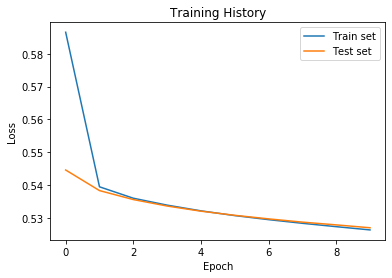

In [0]:
plot_history(history)

### Let's Try Another Model

In [0]:
def build_2nd():
  mod = keras.models.Sequential()
  mod.add( keras.layers.Dense(27*27, activation = 'relu', input_shape = (27,)) )
  mod.add( keras.layers.Dense(27*27, activation = 'relu') )
  mod.add( keras.layers.Dense(27*27, activation = 'relu') )
  mod.add( keras.layers.Dense(27*27, activation = 'relu') )
  mod.add( keras.layers.Dense(27*27, activation = 'relu') )
  mod.add( keras.layers.Dense(27*27, activation = 'relu') )
  mod.add( keras.layers.Dense(27*27, activation = 'relu') )
  mod.add( keras.layers.Dense(1, activation = 'sigmoid'))
  mod.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return mod

In [0]:
results, history = cross_validate(build_2nd, train_data, train_targets)

Train on 21600 samples, validate on 5400 samples
Epoch 1/10
21600/21600 [==============================] - 1s 55us/step - loss: 0.5971 - acc: 0.7692 - val_loss: 0.5427 - val_acc: 0.7787
Epoch 2/10
21600/21600 [==============================] - 1s 36us/step - loss: 0.5333 - acc: 0.7788 - val_loss: 0.5295 - val_acc: 0.7787
Epoch 3/10
21600/21600 [==============================] - 1s 36us/step - loss: 0.5290 - acc: 0.7788 - val_loss: 0.5282 - val_acc: 0.7787
Epoch 4/10
21600/21600 [==============================] - 1s 35us/step - loss: 0.5278 - acc: 0.7788 - val_loss: 0.5272 - val_acc: 0.7787
Epoch 5/10
21600/21600 [==============================] - 1s 33us/step - loss: 0.5267 - acc: 0.7788 - val_loss: 0.5262 - val_acc: 0.7787
Epoch 6/10
21600/21600 [==============================] - 1s 35us/step - loss: 0.5256 - acc: 0.7788 - val_loss: 0.5252 - val_acc: 0.7787
Epoch 7/10
21600/21600 [==============================] - 1s 36us/step - loss: 0.5243 - acc: 0.7788 - val_loss: 0.5239 - val_acc:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train on 21600 samples, validate on 5400 samples
Epoch 1/10
21600/21600 [==============================] - 1s 61us/step - loss: 0.5944 - acc: 0.7708 - val_loss: 0.5412 - val_acc: 0.7787
Epoch 2/10
21600/21600 [==============================] - 1s 34us/step - loss: 0.5325 - acc: 0.7788 - val_loss: 0.5295 - val_acc: 0.7787
Epoch 3/10
21600/21600 [==============================] - 1s 35us/step - loss: 0.5287 - acc: 0.7788 - val_loss: 0.5283 - val_acc: 0.7787
Epoch 4/10
21600/21600 [==============================] - 1s 37us/step - loss: 0.5276 - acc: 0.7788 - val_loss: 0.5274 - val_acc: 0.7787
Epoch 5/10
21600/21600 [==============================] - 1s 34us/step - loss: 0.5267 - acc: 0.7788 - val_loss: 0.5265 - val_acc: 0.7787
Epoch 6/10
21600/21600 [==============================] - 1s 39us/step - loss: 0.5258 - acc: 0.7788 - val_loss: 0.5255 - val_acc: 0.7787
Epoch 7/10
21600/21600 [==============================] - 1s 35us/step - loss: 0.5247 - acc: 0.7788 - val_loss: 0.5244 - val_acc:

In [0]:
for i in results:
  print(i)

Train Metrics  precision    recall  f1-score   support
 
            0       0.78      1.00      0.88     16822
            1       0.00      0.00      0.00      4778
 
     accuracy                           0.78     21600
    macro avg       0.39      0.50      0.44     21600
 weighted avg       0.61      0.78      0.68     21600
 
Test Metrics  precision    recall  f1-score   support

           0       0.78      1.00      0.88      4205
           1       0.00      0.00      0.00      1195

    accuracy                           0.78      5400
   macro avg       0.39      0.50      0.44      5400
weighted avg       0.61      0.78      0.68      5400



Train Metrics  precision    recall  f1-score   support
 
            0       0.78      1.00      0.88     16822
            1       0.00      0.00      0.00      4778
 
     accuracy                           0.78     21600
    macro avg       0.39      0.50      0.44     21600
 weighted avg       0.61      0.78      0.68     21600
 

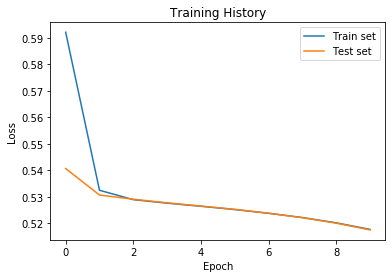

In [0]:
plot_history(history)

## Forse ci siamo!

In [0]:
results, history = cross_validate(create_model, train_data, train_targets, class_weights= {0: 0.23, 1: 0.77})

Train on 21600 samples, validate on 5400 samples
Epoch 1/10
21600/21600 [==============================] - 1s 55us/step - loss: 0.2422 - acc: 0.3103 - val_loss: 0.7073 - val_acc: 0.4020
Epoch 2/10
21600/21600 [==============================] - 1s 27us/step - loss: 0.2416 - acc: 0.4765 - val_loss: 0.6974 - val_acc: 0.5511
Epoch 3/10
21600/21600 [==============================] - 1s 27us/step - loss: 0.2413 - acc: 0.5799 - val_loss: 0.6915 - val_acc: 0.6069
Epoch 4/10
21600/21600 [==============================] - 1s 27us/step - loss: 0.2411 - acc: 0.6092 - val_loss: 0.6872 - val_acc: 0.6294
Epoch 5/10
21600/21600 [==============================] - 1s 26us/step - loss: 0.2409 - acc: 0.6219 - val_loss: 0.6838 - val_acc: 0.6389
Epoch 6/10
21600/21600 [==============================] - 1s 27us/step - loss: 0.2406 - acc: 0.6336 - val_loss: 0.6820 - val_acc: 0.6400
Epoch 7/10
21600/21600 [==============================] - 1s 27us/step - loss: 0.2404 - acc: 0.6353 - val_loss: 0.6804 - val_acc:

In [0]:
for i in results:
  print(i)

Train Metrics  precision    recall  f1-score   support
 
            0       0.81      0.69      0.75     16822
            1       0.29      0.43      0.34      4778
 
     accuracy                           0.64     21600
    macro avg       0.55      0.56      0.55     21600
 weighted avg       0.70      0.64      0.66     21600
 
Test Metrics  precision    recall  f1-score   support

           0       0.81      0.70      0.75      4205
           1       0.29      0.44      0.35      1195

    accuracy                           0.64      5400
   macro avg       0.55      0.57      0.55      5400
weighted avg       0.70      0.64      0.66      5400



Train Metrics  precision    recall  f1-score   support
 
            0       0.80      0.83      0.81     16822
            1       0.30      0.26      0.28      4778
 
     accuracy                           0.70     21600
    macro avg       0.55      0.54      0.55     21600
 weighted avg       0.69      0.70      0.70     21600
 

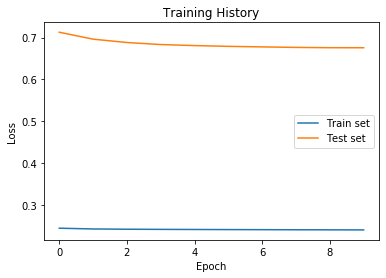

In [0]:
plot_history(history)

In [0]:
results, history = cross_validate(create_model, train_data, train_targets, class_weights= {0: 0.10, 1: 0.90})

Train on 21600 samples, validate on 5400 samples
Epoch 1/10
21600/21600 [==============================] - 2s 70us/step - loss: 0.1904 - acc: 0.3863 - val_loss: 0.7462 - val_acc: 0.2215
Epoch 2/10
21600/21600 [==============================] - 1s 30us/step - loss: 0.1786 - acc: 0.2212 - val_loss: 0.8156 - val_acc: 0.2213
Epoch 3/10
21600/21600 [==============================] - 1s 28us/step - loss: 0.1721 - acc: 0.2212 - val_loss: 0.8760 - val_acc: 0.2213
Epoch 4/10
21600/21600 [==============================] - 1s 29us/step - loss: 0.1685 - acc: 0.2212 - val_loss: 0.9256 - val_acc: 0.2213
Epoch 5/10
21600/21600 [==============================] - 1s 27us/step - loss: 0.1665 - acc: 0.2212 - val_loss: 0.9639 - val_acc: 0.2213
Epoch 6/10
21600/21600 [==============================] - 1s 28us/step - loss: 0.1655 - acc: 0.2212 - val_loss: 0.9928 - val_acc: 0.2213
Epoch 7/10
21600/21600 [==============================] - 1s 28us/step - loss: 0.1649 - acc: 0.2212 - val_loss: 1.0125 - val_acc:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train on 21600 samples, validate on 5400 samples
Epoch 1/10
21600/21600 [==============================] - 1s 69us/step - loss: 0.1865 - acc: 0.3831 - val_loss: 0.7782 - val_acc: 0.2243
Epoch 2/10
21600/21600 [==============================] - 1s 27us/step - loss: 0.1738 - acc: 0.2223 - val_loss: 0.8735 - val_acc: 0.2215
Epoch 3/10
21600/21600 [==============================] - 1s 26us/step - loss: 0.1684 - acc: 0.2213 - val_loss: 0.9385 - val_acc: 0.2213
Epoch 4/10
21600/21600 [==============================] - 1s 26us/step - loss: 0.1661 - acc: 0.2213 - val_loss: 0.9797 - val_acc: 0.2213
Epoch 5/10
21600/21600 [==============================] - 1s 28us/step - loss: 0.1650 - acc: 0.2213 - val_loss: 1.0054 - val_acc: 0.2213
Epoch 6/10
21600/21600 [==============================] - 1s 27us/step - loss: 0.1644 - acc: 0.2213 - val_loss: 1.0190 - val_acc: 0.2213
Epoch 7/10
21600/21600 [==============================] - 1s 28us/step - loss: 0.1639 - acc: 0.2213 - val_loss: 1.0289 - val_acc:

In [0]:
for i in results:
  print(i)

Train Metrics  precision    recall  f1-score   support
 
            0       0.00      0.00      0.00     16822
            1       0.22      1.00      0.36      4778
 
     accuracy                           0.22     21600
    macro avg       0.11      0.50      0.18     21600
 weighted avg       0.05      0.22      0.08     21600
 
Test Metrics  precision    recall  f1-score   support

           0       0.00      0.00      0.00      4205
           1       0.22      1.00      0.36      1195

    accuracy                           0.22      5400
   macro avg       0.11      0.50      0.18      5400
weighted avg       0.05      0.22      0.08      5400



Train Metrics  precision    recall  f1-score   support
 
            0       1.00      0.00      0.00     16822
            1       0.22      1.00      0.36      4778
 
     accuracy                           0.22     21600
    macro avg       0.61      0.50      0.18     21600
 weighted avg       0.83      0.22      0.08     21600
 

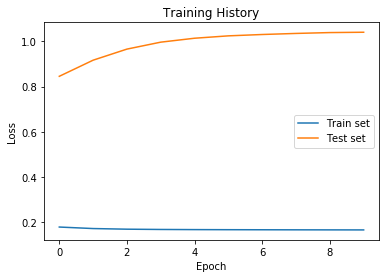

In [0]:
 plot_history(history)

In [0]:
results, history = cross_validate(create_model, train_data, train_targets, class_weights= {0: 0.15, 1: 0.85})

Train on 21600 samples, validate on 5400 samples
Epoch 1/10
21600/21600 [==============================] - 2s 79us/step - loss: 0.2123 - acc: 0.4571 - val_loss: 0.7104 - val_acc: 0.2813
Epoch 2/10
21600/21600 [==============================] - 1s 29us/step - loss: 0.2089 - acc: 0.2650 - val_loss: 0.7361 - val_acc: 0.2448
Epoch 3/10
21600/21600 [==============================] - 1s 28us/step - loss: 0.2068 - acc: 0.2411 - val_loss: 0.7573 - val_acc: 0.2311
Epoch 4/10
21600/21600 [==============================] - 1s 29us/step - loss: 0.2055 - acc: 0.2300 - val_loss: 0.7744 - val_acc: 0.2257
Epoch 5/10
21600/21600 [==============================] - 1s 26us/step - loss: 0.2046 - acc: 0.2262 - val_loss: 0.7886 - val_acc: 0.2235
Epoch 6/10
21600/21600 [==============================] - 1s 28us/step - loss: 0.2040 - acc: 0.2237 - val_loss: 0.8002 - val_acc: 0.2224
Epoch 7/10
21600/21600 [==============================] - 1s 27us/step - loss: 0.2036 - acc: 0.2223 - val_loss: 0.8092 - val_acc:

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train on 21600 samples, validate on 5400 samples
Epoch 1/10
21600/21600 [==============================] - 2s 81us/step - loss: 0.2040 - acc: 0.2219 - val_loss: 0.7984 - val_acc: 0.2211
Epoch 2/10
21600/21600 [==============================] - 1s 28us/step - loss: 0.2031 - acc: 0.2215 - val_loss: 0.8187 - val_acc: 0.2211
Epoch 3/10
21600/21600 [==============================] - 1s 27us/step - loss: 0.2027 - acc: 0.2214 - val_loss: 0.8308 - val_acc: 0.2211
Epoch 4/10
21600/21600 [==============================] - 1s 31us/step - loss: 0.2024 - acc: 0.2213 - val_loss: 0.8374 - val_acc: 0.2211
Epoch 5/10
21600/21600 [==============================] - 1s 29us/step - loss: 0.2022 - acc: 0.2213 - val_loss: 0.8418 - val_acc: 0.2211
Epoch 6/10
21600/21600 [==============================] - 1s 28us/step - loss: 0.2021 - acc: 0.2213 - val_loss: 0.8443 - val_acc: 0.2211
Epoch 7/10
21600/21600 [==============================] - 1s 28us/step - loss: 0.2019 - acc: 0.2213 - val_loss: 0.8454 - val_acc:

In [0]:
for i in results:
  print(i)

Train Metrics  precision    recall  f1-score   support
 
            0       0.73      0.00      0.00     16822
            1       0.22      1.00      0.36      4778
 
     accuracy                           0.22     21600
    macro avg       0.48      0.50      0.18     21600
 weighted avg       0.62      0.22      0.08     21600
 
Test Metrics  precision    recall  f1-score   support

           0       0.60      0.00      0.00      4205
           1       0.22      1.00      0.36      1195

    accuracy                           0.22      5400
   macro avg       0.41      0.50      0.18      5400
weighted avg       0.52      0.22      0.08      5400



Train Metrics  precision    recall  f1-score   support
 
            0       0.00      0.00      0.00     16822
            1       0.22      1.00      0.36      4778
 
     accuracy                           0.22     21600
    macro avg       0.11      0.50      0.18     21600
 weighted avg       0.05      0.22      0.08     21600
 

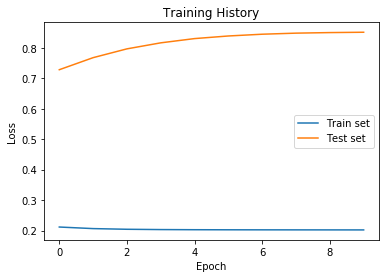

In [0]:
plot_history(history)

In [0]:
results, history = cross_validate(create_model, train_data, train_targets, class_weights= {0: 0.19, 1: 0.81})

Train on 21600 samples, validate on 5400 samples
Epoch 1/10
21600/21600 [==============================] - 2s 90us/step - loss: 0.2301 - acc: 0.4606 - val_loss: 0.7166 - val_acc: 0.3544
Epoch 2/10
21600/21600 [==============================] - 1s 28us/step - loss: 0.2283 - acc: 0.2886 - val_loss: 0.7312 - val_acc: 0.2519
Epoch 3/10
21600/21600 [==============================] - 1s 26us/step - loss: 0.2273 - acc: 0.2399 - val_loss: 0.7395 - val_acc: 0.2296
Epoch 4/10
21600/21600 [==============================] - 1s 28us/step - loss: 0.2267 - acc: 0.2239 - val_loss: 0.7442 - val_acc: 0.2235
Epoch 5/10
21600/21600 [==============================] - 1s 28us/step - loss: 0.2262 - acc: 0.2219 - val_loss: 0.7469 - val_acc: 0.2222
Epoch 6/10
21600/21600 [==============================] - 1s 29us/step - loss: 0.2258 - acc: 0.2217 - val_loss: 0.7485 - val_acc: 0.2209
Epoch 7/10
21600/21600 [==============================] - 1s 28us/step - loss: 0.2254 - acc: 0.2215 - val_loss: 0.7497 - val_acc:

In [0]:
for i in results:
  print(i)

Train Metrics  precision    recall  f1-score   support
 
            0       0.86      0.00      0.00     16822
            1       0.22      1.00      0.36      4778
 
     accuracy                           0.22     21600
    macro avg       0.54      0.50      0.18     21600
 weighted avg       0.72      0.22      0.08     21600
 
Test Metrics  precision    recall  f1-score   support

           0       0.50      0.00      0.00      4205
           1       0.22      1.00      0.36      1195

    accuracy                           0.22      5400
   macro avg       0.36      0.50      0.18      5400
weighted avg       0.44      0.22      0.08      5400



Train Metrics  precision    recall  f1-score   support
 
            0       0.88      0.07      0.12     16822
            1       0.23      0.97      0.37      4778
 
     accuracy                           0.27     21600
    macro avg       0.55      0.52      0.25     21600
 weighted avg       0.74      0.27      0.18     21600
 

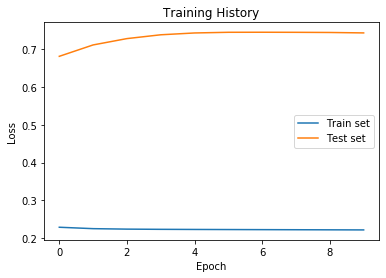

In [0]:
plot_history(history)

In [0]:
results, history = cross_validate(build_2nd, train_data, train_targets, class_weights= {0: 0.23, 1: 0.77})

Train on 21600 samples, validate on 5400 samples
Epoch 1/10
21600/21600 [==============================] - 2s 116us/step - loss: 0.2422 - acc: 0.4506 - val_loss: 0.6899 - val_acc: 0.7724
Epoch 2/10
21600/21600 [==============================] - 1s 38us/step - loss: 0.2420 - acc: 0.7785 - val_loss: 0.6863 - val_acc: 0.7789
Epoch 3/10
21600/21600 [==============================] - 1s 39us/step - loss: 0.2419 - acc: 0.7789 - val_loss: 0.6839 - val_acc: 0.7785
Epoch 4/10
21600/21600 [==============================] - 1s 38us/step - loss: 0.2418 - acc: 0.7787 - val_loss: 0.6822 - val_acc: 0.7787
Epoch 5/10
21600/21600 [==============================] - 1s 36us/step - loss: 0.2417 - acc: 0.7788 - val_loss: 0.6811 - val_acc: 0.7787
Epoch 6/10
21600/21600 [==============================] - 1s 35us/step - loss: 0.2416 - acc: 0.7791 - val_loss: 0.6801 - val_acc: 0.7787
Epoch 7/10
21600/21600 [==============================] - 1s 38us/step - loss: 0.2415 - acc: 0.7806 - val_loss: 0.6791 - val_acc

In [0]:
for i in results:
  print(i)

Train Metrics  precision    recall  f1-score   support
 
            0       0.79      0.99      0.88     16822
            1       0.58      0.07      0.12      4778
 
     accuracy                           0.78     21600
    macro avg       0.69      0.53      0.50     21600
 weighted avg       0.74      0.78      0.71     21600
 
Test Metrics  precision    recall  f1-score   support

           0       0.79      0.99      0.88      4205
           1       0.55      0.06      0.11      1195

    accuracy                           0.78      5400
   macro avg       0.67      0.52      0.49      5400
weighted avg       0.74      0.78      0.71      5400



Train Metrics  precision    recall  f1-score   support
 
            0       0.79      0.99      0.88     16822
            1       0.61      0.05      0.09      4778
 
     accuracy                           0.78     21600
    macro avg       0.70      0.52      0.48     21600
 weighted avg       0.75      0.78      0.70     21600
 

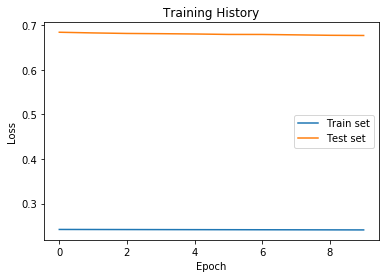

In [0]:
plot_history(history)

In [0]:
results, history = cross_validate(build_2nd, train_data, train_targets, class_weights= {0: 0.15, 1: 0.85})

Train on 21600 samples, validate on 5400 samples
Epoch 1/10
21600/21600 [==============================] - 3s 132us/step - loss: 0.2090 - acc: 0.2538 - val_loss: 0.7327 - val_acc: 0.2213
Epoch 2/10
21600/21600 [==============================] - 1s 38us/step - loss: 0.2058 - acc: 0.2212 - val_loss: 0.7654 - val_acc: 0.2213
Epoch 3/10
21600/21600 [==============================] - 1s 38us/step - loss: 0.2042 - acc: 0.2212 - val_loss: 0.7898 - val_acc: 0.2213
Epoch 4/10
21600/21600 [==============================] - 1s 37us/step - loss: 0.2033 - acc: 0.2212 - val_loss: 0.8079 - val_acc: 0.2213
Epoch 5/10
21600/21600 [==============================] - 1s 38us/step - loss: 0.2029 - acc: 0.2212 - val_loss: 0.8212 - val_acc: 0.2213
Epoch 6/10
21600/21600 [==============================] - 1s 36us/step - loss: 0.2026 - acc: 0.2212 - val_loss: 0.8307 - val_acc: 0.2213
Epoch 7/10
21600/21600 [==============================] - 1s 37us/step - loss: 0.2025 - acc: 0.2212 - val_loss: 0.8376 - val_acc

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train on 21600 samples, validate on 5400 samples
Epoch 1/10
21600/21600 [==============================] - 3s 134us/step - loss: 0.2087 - acc: 0.2213 - val_loss: 0.7358 - val_acc: 0.2213
Epoch 2/10
21600/21600 [==============================] - 1s 39us/step - loss: 0.2057 - acc: 0.2212 - val_loss: 0.7682 - val_acc: 0.2213
Epoch 3/10
21600/21600 [==============================] - 1s 40us/step - loss: 0.2042 - acc: 0.2212 - val_loss: 0.7927 - val_acc: 0.2213
Epoch 4/10
21600/21600 [==============================] - 1s 39us/step - loss: 0.2034 - acc: 0.2212 - val_loss: 0.8112 - val_acc: 0.2213
Epoch 5/10
21600/21600 [==============================] - 1s 37us/step - loss: 0.2030 - acc: 0.2212 - val_loss: 0.8238 - val_acc: 0.2213
Epoch 6/10
21600/21600 [==============================] - 1s 35us/step - loss: 0.2027 - acc: 0.2212 - val_loss: 0.8325 - val_acc: 0.2213
Epoch 7/10
21600/21600 [==============================] - 1s 37us/step - loss: 0.2026 - acc: 0.2212 - val_loss: 0.8385 - val_acc

In [0]:
for i in results:
  print(i)

Train Metrics  precision    recall  f1-score   support
 
            0       0.00      0.00      0.00     16822
            1       0.22      1.00      0.36      4778
 
     accuracy                           0.22     21600
    macro avg       0.11      0.50      0.18     21600
 weighted avg       0.05      0.22      0.08     21600
 
Test Metrics  precision    recall  f1-score   support

           0       0.00      0.00      0.00      4205
           1       0.22      1.00      0.36      1195

    accuracy                           0.22      5400
   macro avg       0.11      0.50      0.18      5400
weighted avg       0.05      0.22      0.08      5400



Train Metrics  precision    recall  f1-score   support
 
            0       0.00      0.00      0.00     16822
            1       0.22      1.00      0.36      4778
 
     accuracy                           0.22     21600
    macro avg       0.11      0.50      0.18     21600
 weighted avg       0.05      0.22      0.08     21600
 

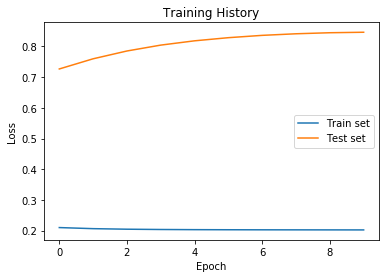

In [0]:
plot_history(history)